In [14]:
# Import C++ perceptron implementation
import pyneuralnet as nn
# Import other libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [15]:
N = 2
a = 0.00001
AdamArgs = (0.9, 0.999)

In [16]:
layers = [
    nn.TanH(784, 500, *AdamArgs), 
    nn.ReLU(500, 300, *AdamArgs), 
    nn.ReLU(300, 100, *AdamArgs), 
    nn.ReLU(100, 100, *AdamArgs), 
    nn.ReLU(100, 50, *AdamArgs), 
    nn.SoftMax(50, 10, *AdamArgs)
]

In [17]:
model = nn.Sequence(layers)

In [18]:
# Load training data
class Data(nn.DataSource):
    def __init__(self):
        super().__init__()
        self.TRAIN_IN, self.TRAIN_OUT = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
    
    def size(self):
        return len(self.TRAIN_IN)
    
    def sample(self, i):
        out = np.zeros((10,1))
        out[self.TRAIN_OUT[i]] = 1.0
        return (self.TRAIN_IN[i], out)

data = Data()
loss = nn.L2Loss()

In [19]:
trainer = nn.Trainer(model, data, loss)

Training of model complete in 164.51432526111603 seconds per epoch.


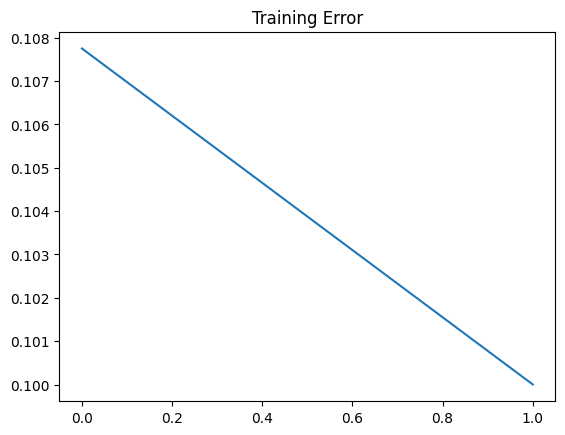

In [20]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()